In [1]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [2]:
import gspread
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
gc = gspread.service_account(filename='/content/service_account_lou.json')

In [4]:
sht = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Du7zN4gZq09FfRW1NOY7W6Gs8Q7T_cOY7PSnqgzIcXs/edit#gid=2110653258')

In [5]:
form_responses_1 = sht.worksheet("Form Responses 1")

In [6]:
fr1_df = pd.DataFrame.from_records(form_responses_1.get_all_records())
fr1_df.columns

Index(['Timestamp', 'Are you a HQ or retail employee? ',
       'On a scale of 1-10, How comfortable do you feel that you can authentically be yourself, AND be successful at the same time while at work? ',
       'Please explain why you answered the above',
       'On a scale of 1-10, How comfortable do you feel speaking up when you see signs of bias at Parachute? ',
       'On a scale of 1-10, How would you rate yourself as being a creator of an inclusive workplace at Parachute? ',
       'How would you rate Parachute's Diversity?',
       'How Inclusive do you feel Parachute is?',
       'Do I consider myself to be a member of the majority-group or non-majority group at Parachute in terms of race?',
       'Do I consider myself to be a member of the majority-group non-majority group at Parachute in terms of gender?',
       'Do you believe that everyone in the company gets access to equal employment opportunities?',
       'Candidates of diverse backgrounds are encouraged to apply fo

In [7]:
#for sheet#1
fr1_df = fr1_df.rename(columns={fr1_df.columns[1]: "HQ or Retail",
                      fr1_df.columns[2]: "Being Authentic vs. Successful",
                     "Please explain why you answered the above": "Reason for #1 Answer",
                     fr1_df.columns[4]: "Signs of Bias",
                     fr1_df.columns[5]: "Creator of an Inclusive Space",
                     "How would you rate Parachute's Diversity?": "Diversity of the Company",
                     "How Inclusive do you feel Parachute is?": "Inclusivity",
                     "Do I consider myself to be a member of the majority-group or non-majority group at Parachute in terms of race?": "Majority Group vs. Non-Majority",
                     "Do I consider myself to be a member of the majority-group non-majority group at Parachute in terms of gender?": "Majority vs. Non-Majority - Gender",
                      "Do you believe that everyone in the company gets access to equal employment opportunities?": "EEO Ok?",
                       "Candidates of diverse backgrounds are encouraged to apply for positions.": "Diversity in Hiring",
                      "Do you have any additional comments, suggestions or feedback around Diversity & Inclusion at Parachute?": "Comments & Suggestions",
                      "On a scale of 1-10, what is your level of satisfaction with the Work from Anywhere Program?": "Remote Work Satisfaction",
                       "On a scale of 1-10, what is your level of satisfaction with the theory of No Distraction Tuesdays?": "Satisfaction of No Theory Tuesday",
                       "Are you satisfied with the day/time of No Distraction Tuesdays? Please comment below if you have other suggestion.": "Day/Time of NDS Ok?", 
                       "Any additional comments/feedback": "Final Comment & Feedback"})


In [ ]:
fr1_df.head()

,Timestamp,HQ or Retail,Being Authentic vs. Successful,Reason for #1 Answer,Signs of Bias,Creator of an Inclusive Space,Diversity of the Company,Inclusivity,Majority Group vs. Non-Majority,Majority vs. Non-Majority - Gender,EEO Ok?,Diversity in Hiring,Comments & Suggestions,Remote Work Satisfaction,Satisfaction of No Theory Tuesday,Day/Time of NDS Ok?,Final Comment & Feedback
0,8/31/2020 12:02:11,HQ,7,I would love to give feedbacks and suggestions...,4,7,6,8,Non-Majority,Majority,Neutral,Agree,I love ParachuteHome's Culture and I believe e...,9,10,8,It would be nice if there could be more No Dis...
1,8/31/2020 12:16:53,HQ,7,I don't feel that I have been given an opportu...,7,4,1,6,Majority,Majority,Disagree,Disagree,I would love to see emphasis on hiring BIPOC c...,9,5,5,
2,9/1/2020 7:11:04,Retail,8,We do what we can with what we have.,5,6,2,4,Majority,Majority,Agree,Neutral,,1,1,1,Not possible for retail and nothing similar is...
3,9/1/2020 9:44:34,Retail,8,I embrace diversity and look at our difference...,6,9,5,6,Non-Majority,Majority,Agree,Agree,I really believe in the steps we are taking as...,10,8,8,
4,9/2/2020 7:10:23,HQ,8,I think the main thing is I am not apart of th...,9,3,2,7,Non-Majority,Majority,Neutral,Disagree,None at the moment,10,10,10,


In [ ]:
X_reg = fr1_df[["Being Authentic vs. Successful", "Signs of Bias", "Creator of an Inclusive Space", "Diversity of the Company", "Inclusivity"]]
Y_reg = fr1_df["Remote Work Satisfaction"]

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from random import randint
import math

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_reg,Y_reg,test_size = 0.15)

In [ ]:
pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("rf",RandomForestRegressor())])
parameters = {
    'scaler__with_mean': [True, False, True, False],
    'scaler__with_std': [True, False, True, False],
  'rf__n_estimators':[1,10,100,1000],
  'rf__min_samples_split': [2,3,4,5]
  }

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_impurity_split', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [ ]:
grid_pipeline = GridSearchCV(pipeline,parameters)
grid_pipeline.fit(X_train,y_train)
grid_pipeline.best_params_

{'rf__min_samples_split': 3,
 'rf__n_estimators': 10,
 'scaler__with_mean': True,
 'scaler__with_std': False}

In [ ]:
pipeline_fin = Pipeline([( "scaler" , StandardScaler(with_mean=True, with_std=False)),
                       ("rf",RandomForestRegressor(min_samples_split=3, n_estimators=10))])

In [ ]:
pipeline_fin.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=False)),
                ('rf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=3,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
X_rands = []
for i in range(20):
  X_rands.append([randint(1, 10), randint(1, 10), randint(1, 10), randint(1, 10), randint(1, 10)])

X_rands

[[6, 3, 2, 4, 4],
 [2, 10, 8, 4, 7],
 [1, 8, 8, 1, 7],
 [8, 9, 7, 5, 3],
 [9, 10, 6, 8, 10],
 [9, 6, 4, 2, 9],
 [8, 1, 2, 7, 8],
 [6, 2, 5, 6, 9],
 [6, 8, 3, 4, 5],
 [9, 3, 9, 5, 1],
 [8, 8, 7, 7, 3],
 [3, 7, 3, 3, 3],
 [5, 3, 2, 7, 9],
 [7, 9, 5, 3, 2],
 [6, 10, 2, 10, 6],
 [10, 8, 2, 6, 2],
 [3, 8, 5, 9, 10],
 [1, 3, 5, 8, 8],
 [4, 8, 5, 3, 10],
 [10, 10, 6, 9, 8]]

In [ ]:
pred_ys = []

for rand in X_rands:
  pred_ys.extend(pipeline_fin.predict([rand]))

pred_ys = [int(round(x)) for x in pred_ys]

pred_ys

[5, 6, 7, 3, 8, 10, 9, 9, 5, 8, 3, 4, 9, 3, 8, 4, 9, 8, 8, 9]

In [ ]:
fig= plt.figure(figsize=(40,20))
plt.plot(X_reg, Y_reg, label="Actual Values")
plt.plot(X_rands, pred_ys, "--", label="Predicted Values")
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(40,18))
bplt = sns.barplot(x="Being Authentic vs. Successful", 
           y="Creator of an Inclusive Space",
           hue="HQ or Retail",
           data=fr1_df)
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
plt.legend(fontsize=20)
plt.xlabel("Being Authentic vs. Successful", size=34)
plt.ylabel("Creator of an Inclusive Space", size=34)
plt.savefig("being-authentic-vs-creator-of-inclusive-space.svg", format="svg")
plt.show()


In [ ]:
plt.pie(fr1_df["Majority Group vs. Non-Majority"], startangle = 90, shadow = True)
plt.show()

In [ ]:
!pip install pygal

In [ ]:
import pygal

In [ ]:
gauge_chart = pygal.Gauge()

In [ ]:
gauge_chart.title = "Satisfaction of No Theory Tuesday"

In [ ]:
gauge_chart.range = [0, 10]
for score, hq_ret  in zip(fr1_df["Satisfaction of No Theory Tuesday"].values, fr1_df["HQ or Retail"].values):
  if score:  
    print(f"{hq_ret} : {score}")
    gauge_chart.add(hq_ret, int(score))

In [ ]:
gauge_chart.render_to_png("gauge_no_dist_score.png")

In [ ]:
!pip install cairosvg

In [ ]:
ret = []
hq = []

for score, hq_ret  in zip(fr1_df["Satisfaction of No Theory Tuesday"].values, fr1_df["HQ or Retail"].values):
  if score:  
    if hq_ret == "Retail":
      ret.append(score)
    else:
      hq.append(score)

dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.title = 'Satisfaction of Employees from NDT Plan'
dot_chart.add('Retail', ret)
dot_chart.add('HQ', hq)


In [ ]:
dot_chart.render_to_png("dot_satisfaction.png")

In [ ]:
majority_cnt = 0
nmjrity_cnt = 0

for grp in fr1_df["Majority Group vs. Non-Majority"]:
  if grp == "Majority":
    majority_cnt += 1
  else:
    nmjrity_cnt += 1

pie_chart = pygal.Pie()
pie_chart.title = 'Belonging to Majority Group vs. Non-Majority'
pie_chart.add('Majority', majority_cnt)
pie_chart.add('Non-Majority', nmjrity_cnt)
pie_chart.render_to_png("mjrty_grp.png")

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,12))
ax = plt.axes(projection='3d')

ax.scatter3D(fr1_df["Creator of an Inclusive Space"],
             fr1_df["Diversity of the Company"],
             fr1_df["Inclusivity"], c=fr1_df["Inclusivity"], cmap='Greens')

ax.set_xlabel("Creator of an Inclusive Space")
ax.set_ylabel("Diversity of the Company")
ax.set_zlabel("Inclusivity")

In [ ]:
gauge = pygal.SolidGauge(inner_radius=0.70)
gauge.title = "Mean of Scores"
gauge.add('Being Authentic vs. Successful', [{'value': fr1_df["Being Authentic vs. Successful"].values.mean() , 'max_value': 10}])
gauge.add('Signs of Bias', [{'value': fr1_df["Signs of Bias"].values.mean() , 'max_value': 10}])
gauge.add('Creator of an Inclusive Space', [{'value': fr1_df["Creator of an Inclusive Space"].values.mean() , 'max_value': 10}])
gauge.add('Diversity of the Company', [{'value': fr1_df["Diversity of the Company"].values.mean() , 'max_value': 10}])
gauge.add('Inclusivity', [{'value': fr1_df["Inclusivity"].values.mean() , 'max_value': 10}])
gauge.add('Remote Work Satisfaction', [{'value': fr1_df["Remote Work Satisfaction"].values.mean() , 'max_value': 10}])
gauge.add('Satisfaction of No Theory Tuesday', [{'value': 7.486486486486487 , 'max_value': 10}])
gauge.add('Day/Time of NDS Ok?', [{'value': 6.7534246575342465 , 'max_value': 10}])

gauge.render_to_png("solid_gauge.mean.png")


In [ ]:
n = 0
sum = 0

for sat in fr1_df["Day/Time of NDS Ok?"].values:
  if type(sat) == int:
    n += 1
    sum += sat

sum / n

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
polarity_scores = []

for reason in fr1_df["Comments & Suggestions"].values:
  if reason:
    polarity_scores.append({"reason": reason, "score": vader.polarity_scores(reason)})

In [ ]:
polarity_scores

In [ ]:
neg_sum = 0
neut_sum = 0
pos_sum = 0

for score in polarity_scores:
  neg_sum += score["score"]["neg"]
  neut_sum += score["score"]["neu"]
  pos_sum += score["score"]["pos"]

In [ ]:
sum = neg_sum + neut_sum + pos_sum

perct = lambda x: 

pie_chart = pygal.Pie()
pie_chart.show_x_labels = True
pie_chart.show_y_labels = True
pie_chart.title = 'Sentiment Score of Question #2 "The reason for your answer to question #1"'
pie_chart.add('Negative', neg_sum)
pie_chart.add('Neutral', neut_sum)
pie_chart.add('Positive', pos_sum)
pie_chart.render_to_file("sentiment_ans.html")

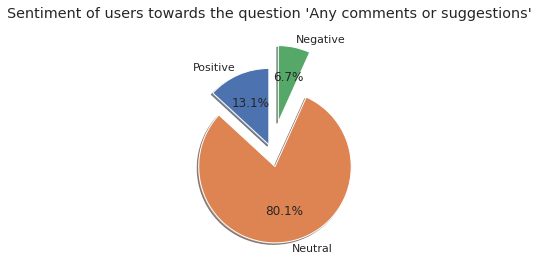

In [ ]:

fig1, ax1 = plt.subplots()
ax1.pie([pos_sum, neut_sum, neg_sum], explode=[0.1, 0.2, 0.4], labels=["Positive", "Neutral", "Negative"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Sentiment of users towards the question 'Any comments or suggestions'")
plt.savefig("sentiment-towards-any-comments.svg")
plt.show()


[7, 7, 8, 8, 8, 7, 8, 9, 9, 9, 10, 9, 9, 9, 9, 8, 10, 8, 8, 9, 9, 10, 10, 10, 9, 7, 8, 10, 9, 7, 7, 8, 7, 10, 9, 10, 10, 10, 10, 8, 10, 9, 9, 9, 9, 8, 9, 8, 8, 8, 8, 10, 9, 8, 9, 7, 10, 10, 3, 9, 8, 10, 7, 8, 10, 10, 7, 10, 8, 10, 10, 10, 8, 10, 8, 10, 7]


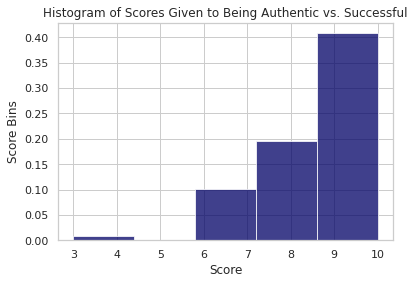

In [ ]:
x = [int(x) for x in fr1_df["Being Authentic vs. Successful"].values]
 
print(x)

n, bins, patches = plt.hist(x, 5, density=True, facecolor='#006', alpha=0.75)


plt.xlabel('Score')
plt.ylabel('Score Bins')
plt.title('Histogram of Scores Given to Being Authentic vs. Successful')
plt.grid(True)
plt.savefig("hist-Being-Authentic-vs-Successful.svg")
plt.show()


In [ ]:
fr1_df.columns

Index(['Timestamp', 'HQ or Retail', 'Being Authentic vs. Successful',
       'Reason for #1 Answer', 'Signs of Bias',
       'Creator of an Inclusive Space', 'Diversity of the Company',
       'Inclusivity', 'Majority Group vs. Non-Majority',
       'Majority vs. Non-Majority - Gender', 'EEO Ok?', 'Diversity in Hiring',
       'Comments & Suggestions', 'Remote Work Satisfaction',
       'Satisfaction of No Theory Tuesday', 'Day/Time of NDS Ok?',
       'Final Comment & Feedback'],
      dtype='object')

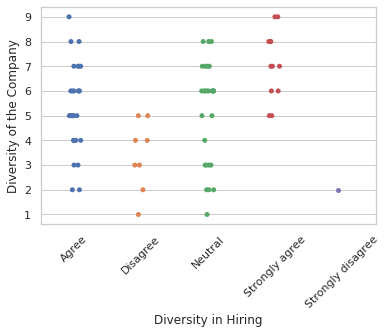

In [ ]:
ax = sns.stripplot(x="Diversity in Hiring", y="Diversity of the Company", data=fr1_df)
ax.tile = "Comparing Diversity in Hiring with Score in Diversity of Company"
plt.xticks(rotation=45)
plt.savefig("comparing-diversity-in-hiring-with-scores-in-diversity.svg")
plt.show()


In [ ]:
!pip install rake-nltk
nltk.download('stopwords')

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=8f7a33b42ef229666cb1c44452d6e5b9335db31666c0e830c78d16f6c47fb45a
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from rake_nltk import Rake

r = Rake()

keywords = []

for text in fr1_df["Final Comment & Feedback"].values:
  if text:
    r.extract_keywords_from_text(text)
    keywords.append({"text": text, "keywords": r.get_ranked_phrases()})



In [ ]:

from rake_nltk import Rake

r = Rake()

keywords = []

for text in fr1_df["Comments & Suggestions"].values:
  if text:
    r.extract_keywords_from_text(text)
    keywords.extend(r.get_ranked_phrases())


In [ ]:
counts = {}

for word in keywords:
  if word in counts:
    counts[word] += 1
  else:
    counts[word] = 1

{'think': 8, 'company': 6, 'hq': 5, 'parachute': 5, 'diversity': 4, 'see': 4, 'working': 4, 'diverse': 4, 'feel': 4, 'people': 4, 'work': 3, 'hiring': 3, 'feel like': 3, 'happy': 3, 'hard': 2, 'want': 2, 'well': 2, 'n': 2, 'mentorship program': 2, 'glad': 2, 'making': 2, 'stand': 2, 'diverse team': 2, 'color': 2, 'positions': 2, 'white': 2, 'made since': 2, 'commitment': 2, 'important': 2, 'communities': 2, 'focus': 2, 'hope': 2, 'apply': 2, 'best': 2, 'hired': 2, 'know': 2, 'look': 2, 'done': 2, 'great': 2, 'diverse backgrounds': 2, 'times': 2, 'direction': 1, 'love': 1, 'power': 1, 'show': 1, 'think hiring': 1, 'attract bipoc': 1, 'eliminate bias': 1, 'huge component': 1, 'inclusive brand': 1, 'work inside first': 1, 'sure taken steps': 1, 'ask': 1, 'beginning': 1, 'beyond': 1, 'box': 1, 'conversation': 1, 'experience': 1, 'late': 1, 'norm': 1, 'notice': 1, 'organization': 1, 'requirement': 1, 'seem': 1, 'society': 1, 'somewhat': 1, 'though': 1, 'continue': 1, 'taken': 1, 'go': 1, 'o

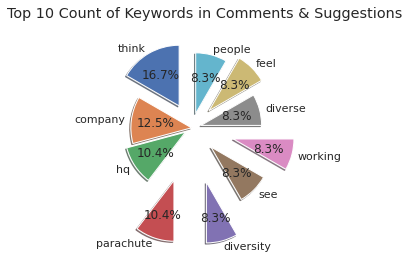

In [ ]:
from random import uniform
import operator

res = {}

for l in reversed(sorted(counts.items(), key=operator.itemgetter(1))):
  res[l[0]] = l[1]

print(res)

ex = [uniform(0, 1) for s in list(res.keys())[:10]]

fig1, ax1 = plt.subplots()
ax1.pie(list(res.values())[:10], explode=ex, labels=list(res.keys())[:10], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Top 10 Count of Keywords in Comments & Suggestions")
plt.savefig("top-10-count-of-keywords-in-commentssuggestions.svg")
plt.show()


In [ ]:
counts.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 3, 4, 2, 4, 1, 3, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 4, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
keyword_counts = {}

for keyword in keywords:
  for kwd in keyword["keywords"]:
    if kwd in keyword_counts.keys():
      keyword_counts[kwd] += 1
    else:
      keyword_counts[kwd] = 1

In [ ]:
width = np.pi / 4 * np.random.rand(len(keyword_counts.keys()))
colors = plt.cm.viridis(len(keyword_counts.keys()) / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(keyword_counts.keys(), keyword_counts.values(), width=width, bottom=0.0, color=colors, alpha=0.5)

plt.suptitle("Frequency of top words written in the last question regarding any recommendations")

plt.show()


In [ ]:
import numpy as np

In [ ]:
agree_cnt = 0
disagree_cnt =0

for div in fr1_df["Diversity in Hiring"]:
  if div == "Agree":
    agree_cnt += 1
  else:
    disagree_cnt += 1

  

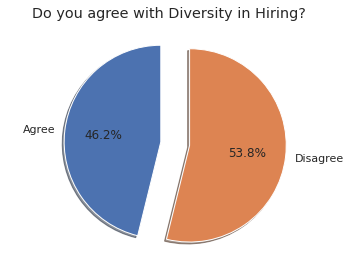

In [ ]:

fig1, ax1 = plt.subplots()
ax1.pie([agree_cnt, disagree_cnt], explode=[0.1, 0.2], labels=["Agree", "Disagree"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Do you agree with Diversity in Hiring?")
plt.savefig("agree-with-diversity-in-hiring.svg")
plt.show()


In [ ]:
hq_cnt = 0
retail_cnt =0

for div in fr1_df["HQ or Retail"]:
  if div == "HQ":
    hq_cnt += 1
  else:
    retail_cnt += 1

  

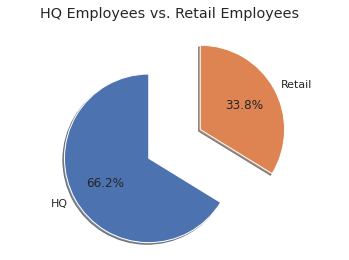

In [ ]:

fig1, ax1 = plt.subplots()
ax1.pie([hq_cnt, retail_cnt], explode=[0.5, 0.2], labels=["HQ", "Retail"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("HQ Employees vs. Retail Employees")
plt.savefig("hq-vs-retail-employees.svg")
plt.show()


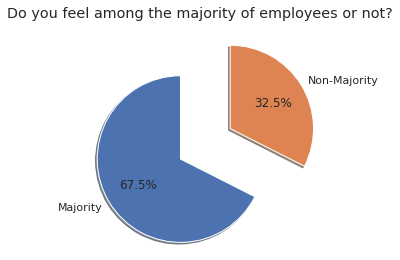

In [ ]:
hq_cnt = 0
retail_cnt =0

for div in fr1_df["Majority Group vs. Non-Majority"]:
  if div == "Majority":
    hq_cnt += 1
  else:
    retail_cnt += 1

fig1, ax1 = plt.subplots()
ax1.pie([hq_cnt, retail_cnt], explode=[0.5, 0.2], labels=["Majority", "Non-Majority"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Do you feel among the majority of employees or not?")
plt.savefig("are-you-majority.svg")
plt.show()


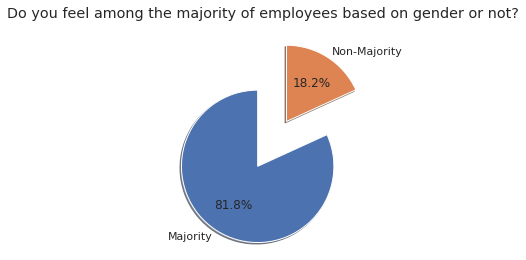

In [ ]:
hq_cnt = 0
retail_cnt =0

for div in fr1_df["Majority vs. Non-Majority - Gender"]:
  if div == "Majority":
    hq_cnt += 1
  else:
    retail_cnt += 1

fig1, ax1 = plt.subplots()
ax1.pie([hq_cnt, retail_cnt], explode=[0.5, 0.2], labels=["Majority", "Non-Majority"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Do you feel among the majority of employees based on gender or not?")
plt.savefig("are-you-majority-gender.svg")
plt.show()


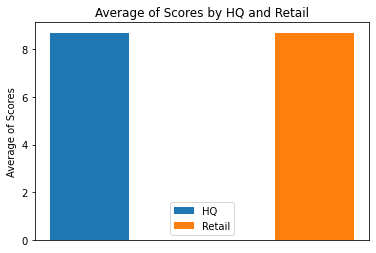

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []

for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Being Authentic vs. Successful"]):
  if div == "HQ":
    auth_score_hq.append(score)
  else:
    retail_cnt += 1
    auth_score_retail.append(score)


fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of Scores')
ax.set_title('Average of Scores by HQ and Retail')
ind = np.arange(1)
plt.xticks(ind, ('HQ', 'Retail'))
ax.legend()


plt.show()
plt.savefig("test.svg")

In [ ]:
import numpy as np

In [ ]:
sum(auth_score_retail) / len(auth_score_retail)

8.692307692307692

[]
[]


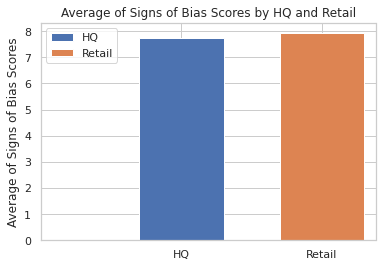

In [ ]:
import numpy as np
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Signs of Bias"]):
  if div == "HQ":
    auth_score_hq.append(score)
  else:
    retail_cnt += 1
    auth_score_retail.append(score)

width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of Signs of Bias Scores')
ax.set_title('Average of Signs of Bias Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()

plt.savefig("average-of-signs-of-bias-scores-divied.svg")
plt.show()


In [ ]:
import numpy as np


[]
[]
7.764705882352941
8.076923076923077


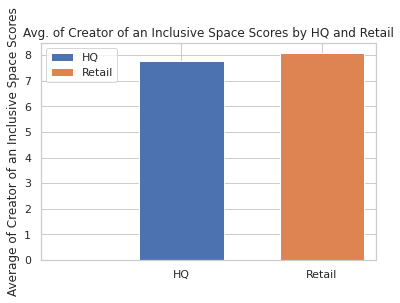

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Creator of an Inclusive Space"]):
  if div == "HQ":
    auth_score_hq.append(score)
  else:
    retail_cnt += 1
    auth_score_retail.append(score)
print(sum(auth_score_hq) / len(auth_score_hq))
print(sum(auth_score_retail) / len(auth_score_retail))
width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of Creator of an Inclusive Space Scores')
ax.set_title('Avg. of Creator of an Inclusive Space Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()

plt.savefig("average-of-an-inclusive-space-divived.svg")
plt.show()


[]
[]
5.215686274509804
5.5


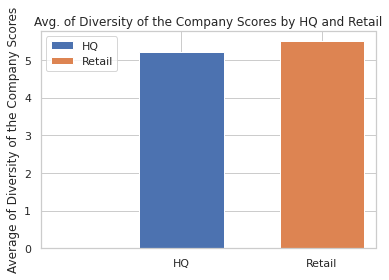

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Diversity of the Company"]):
  if div == "HQ":
    auth_score_hq.append(score)
  else:
    retail_cnt += 1
    auth_score_retail.append(score)
print(sum(auth_score_hq) / len(auth_score_hq))
print(sum(auth_score_retail) / len(auth_score_retail))
width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of Diversity of the Company Scores')
ax.set_title('Avg. of Diversity of the Company Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()
plt.savefig("avg-of-diversity-company-scores-divived.svg")

plt.show()


[]
[]
7.333333333333333
7.038461538461538


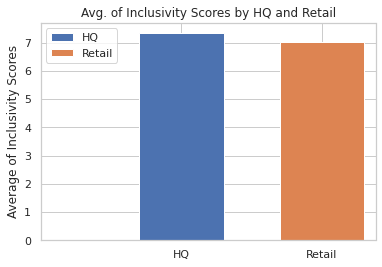

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Inclusivity"]):
  if div == "HQ":
    auth_score_hq.append(score)
  else:
    retail_cnt += 1
    auth_score_retail.append(score)
print(sum(auth_score_hq) / len(auth_score_hq))
print(sum(auth_score_retail) / len(auth_score_retail))
width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average of Inclusivity Scores')
ax.set_title('Avg. of Inclusivity Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()
plt.savefig("avg-of-inclusivity-scores-by-hq-retail.svg")

plt.show()


[]
[]
9.058823529411764
5.538461538461538


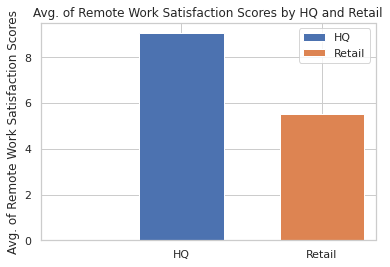

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Remote Work Satisfaction"]):
  if div == "HQ":
    auth_score_hq.append(score)
  else:
    retail_cnt += 1
    auth_score_retail.append(score)
print(sum(auth_score_hq) / len(auth_score_hq))
print(sum(auth_score_retail) / len(auth_score_retail))
width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. of Remote Work Satisfaction Scores')
ax.set_title('Avg. of Remote Work Satisfaction Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()
plt.savefig("avg-of-remote-work-satsifaction.svg")

plt.show()


[]
[]
8.66
5.041666666666667


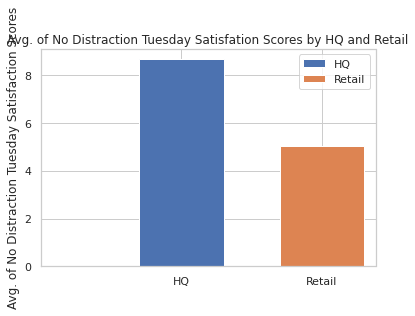

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Satisfaction of No Theory Tuesday"]):
  if type(score) == int:
    if div == "HQ":
      auth_score_hq.append(score)
    else:
      retail_cnt += 1
      auth_score_retail.append(score)
print(sum(auth_score_hq) / len(auth_score_hq))
print(sum(auth_score_retail) / len(auth_score_retail))
width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. of No Distraction Tuesday Satisfaction Scores')
ax.set_title('Avg. of No Distraction Tuesday Satisfation Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()

plt.savefig("avg-of-no-distraction-tuesday-divided.svg")
plt.show()


[]
[]
7.84
4.391304347826087


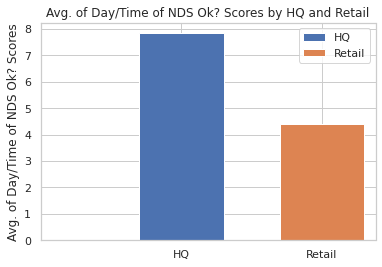

In [ ]:
hq_cnt = 0
retail_cnt =0
auth_score_hq = []
auth_score_retail = []
print(auth_score_hq)
print(auth_score_retail)
for div, score in zip(fr1_df["HQ or Retail"], fr1_df["Day/Time of NDS Ok?"]):
  if type(score) == int:
    if div == "HQ":
      auth_score_hq.append(score)
    else:
      retail_cnt += 1
      auth_score_retail.append(score)
print(sum(auth_score_hq) / len(auth_score_hq))
print(sum(auth_score_retail) / len(auth_score_retail))
width = 0.6
fig, ax = plt.subplots()
rects1 = ax.bar(1, sum(auth_score_hq) / len(auth_score_hq), width, label='HQ')
rects2 = ax.bar(2 , sum(auth_score_retail) / len(auth_score_retail), width, label='Retail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. of Day/Time of NDS Ok? Scores')
ax.set_title('Avg. of Day/Time of NDS Ok? Scores by HQ and Retail')
ind = np.arange(3)
plt.xticks(ind, ("", 'HQ', 'Retail'))
ax.legend()

plt.savefig("avg-of-nds-time-divided.svg")
plt.show()


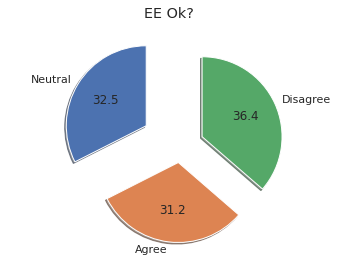

In [ ]:
neutral_cnt = 0
agree_cnt =0
disagree_cnt = 0

for div in fr1_df["EEO Ok?"]:
  if div == "Neutral":
    neutral_cnt += 1
  elif div == "Agree":
    agree_cnt += 1
  else:
    disagree_cnt += 1

fig1, ax1 = plt.subplots()
ax1.pie([neutral_cnt, agree_cnt, disagree_cnt], explode=[0.5, 0.2, 0.3], labels=["Neutral", "Agree", "Disagree"], autopct='%1.1f',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("EE Ok?")
plt.savefig("eeo-ok.svg")
plt.show()


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the dataset
crashes = fr1_df
crashes["total"] = crashes["HQ or Retail"]

for index, row in crashes.iterrows():
  crashes["total"][index] = sum(row[["Being Authentic vs. Successful",
                                 "Signs of Bias",
                                 "Creator of an Inclusive Space",
                                 "Diversity of the Company",
                                 "Inclusivity"]])
print("Crash total created")
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes[["Being Authentic vs. Successful",
                                 "Signs of Bias",
                                 "Creator of an Inclusive Space",
                                 "Diversity of the Company",
                                 "Inclusivity"]], y_vars=crashes["HQ or Retail"],
                 height=10, aspect=.25)
print("Pairgrid created")
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="flare_r", linewidth=1, edgecolor="w")
print("Mapped")
# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 10), xlabel="Scores", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Being Authentic vs. Successful",
                                 "Signs of Bias",
                                 "Creator of an Inclusive Space",
                                 "Diversity of the Company",
                                 "Inclusivity"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

print("Done")

sns.despine(left=True, bottom=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Crash total created


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f765247e620> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f765136eb70> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.load_dataset("car_crashes").head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
crashes = fr1_df
crashes["total"] = crashes["HQ or Retail"]

for index, row in crashes.iterrows():
  crashes["total"][index] = sum(row[["Being Authentic vs. Successful",
                                 "Signs of Bias",
                                 "Creator of an Inclusive Space",
                                 "Diversity of the Company",
                                 "Inclusivity", "Remote Work Satisfaction" ]])
  
crashes.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Timestamp,HQ or Retail,Being Authentic vs. Successful,Reason for #1 Answer,Signs of Bias,Creator of an Inclusive Space,Diversity of the Company,Inclusivity,Majority Group vs. Non-Majority,Majority vs. Non-Majority - Gender,EEO Ok?,Diversity in Hiring,Comments & Suggestions,Remote Work Satisfaction,Satisfaction of No Theory Tuesday,Day/Time of NDS Ok?,Final Comment & Feedback,total
0,8/31/2020 12:02:11,HQ,7,I would love to give feedbacks and suggestions...,4,7,6,8,Non-Majority,Majority,Neutral,Agree,I love ParachuteHome's Culture and I believe e...,9,10,8,It would be nice if there could be more No Dis...,41
1,8/31/2020 12:16:53,HQ,7,I don't feel that I have been given an opportu...,7,4,1,6,Majority,Majority,Disagree,Disagree,I would love to see emphasis on hiring BIPOC c...,9,5,5,,34
2,9/1/2020 7:11:04,Retail,8,We do what we can with what we have.,5,6,2,4,Majority,Majority,Agree,Neutral,,1,1,1,Not possible for retail and nothing similar is...,26
3,9/1/2020 9:44:34,Retail,8,I embrace diversity and look at our difference...,6,9,5,6,Non-Majority,Majority,Agree,Agree,I really believe in the steps we are taking as...,10,8,8,,44
4,9/2/2020 7:10:23,HQ,8,I think the main thing is I am not apart of th...,9,3,2,7,Non-Majority,Majority,Neutral,Disagree,None at the moment,10,10,10,,39


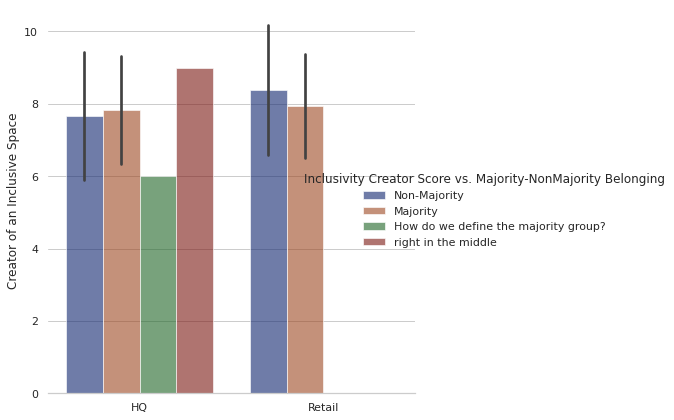

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=crashes, kind="bar",
    x="HQ or Retail", y="Creator of an Inclusive Space", hue="Majority Group vs. Non-Majority",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Creator of an Inclusive Space")
g.legend.set_title("Inclusivity Creator Score vs. Majority-NonMajority Belonging")
plt.savefig("inclusivity-creator-vs-mjrity-nmjirty-beloning.svg")

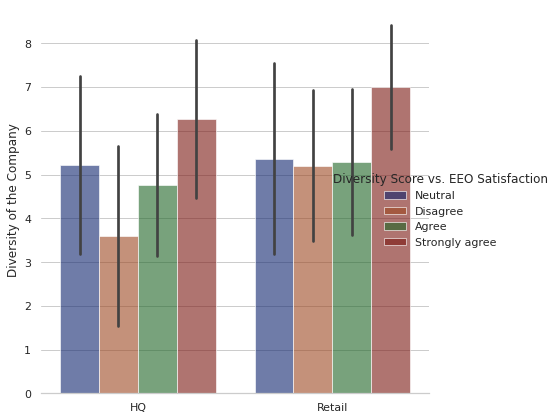

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=crashes, kind="bar",
    x="HQ or Retail", y="Diversity of the Company", hue="EEO Ok?",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Diversity of the Company")
g.legend.set_title("Diversity Score vs. EEO Satisfaction")
plt.savefig("diversity-score-vs-eeo-satisfaction.svg")

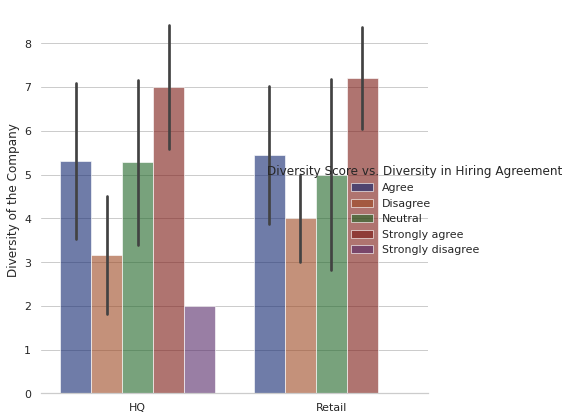

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=crashes, kind="bar",
    x="HQ or Retail", y="Diversity of the Company", hue="Diversity in Hiring",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Diversity of the Company")
g.legend.set_title("Diversity Score vs. Diversity in Hiring Agreement")
plt.savefig("diversity-score-vs-diversity-in-hiring.svg")

In [ ]:
df = pd.melt(fr1_df, id_vars=['Satisfaction of No Theory Tuesday', 'Day/Time of NDS Ok?'], var_name='No-Distraction Tuesday Satisfaction', value_name='Day/Time of NDS Ok?')
g = sns.FacetGrid(df, col="Satisfaction of No Theory Tuesday", hue="Day/Time of NDS Ok?",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "Satisfaction of No Theory Tuesday", "Day/Time of NDS Ok?")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: ignored

In [ ]:
import plotly.express as px

fig = px.scatter(fr1_df, x="Creator of an Inclusive Space", y="Inclusivity",
	         size="Remote Work Satisfaction", color="HQ or Retail", log_x=True, size_max=60)
fig.write_image("bubble.svg")

In [ ]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly
plotly.io.orca.config.executable = '/usr/local/bin/orca'

In [ ]:
import plotly.express as px

fig = px.scatter(fr1_df, x="Diversity of the Company", y="Signs of Bias",
	         size="Being Authentic vs. Successful", color="HQ or Retail", log_x=True, size_max=60)
plotly.offline.plot(fig, image_filename="bubble", image='svg')

'temp-plot.html'

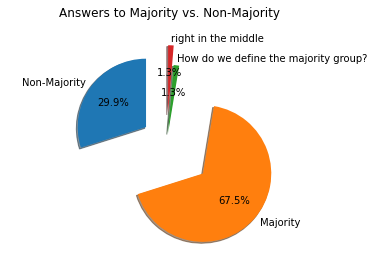

In [ ]:
vals = {}

for val in fr1_df["Majority Group vs. Non-Majority"]:
  if val in vals:
    vals[val] += 1
  else:
    vals[val] = 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Answers to Majority vs. Non-Majority")
plt.savefig("majority-vs-non-percentage.svg")
plt.show()


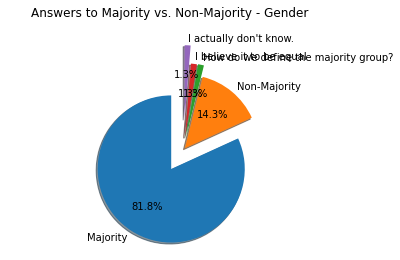

In [ ]:
vals = {}

for val in fr1_df["Majority vs. Non-Majority - Gender"]:
  if val in vals:
    vals[val] += 1
  else:
    vals[val] = 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Answers to Majority vs. Non-Majority - Gender")
plt.savefig("majority-vs-gender-percentage.svg")
plt.show()


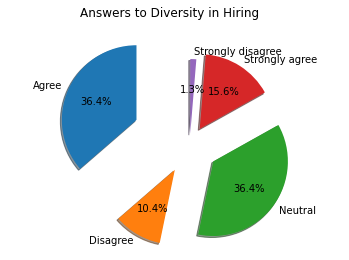

In [ ]:
vals = {}

for val in fr1_df["Diversity in Hiring"]:
  if val in vals:
    vals[val] += 1
  else:
    vals[val] = 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Answers to Diversity in Hiring")
plt.savefig("diversity-percentage.svg")
plt.show()


In [9]:
fr1_df.columns

Index(['Timestamp', 'HQ or Retail', 'Being Authentic vs. Successful',
       'Reason for #1 Answer', 'Signs of Bias',
       'Creator of an Inclusive Space', 'Diversity of the Company',
       'Inclusivity', 'Majority Group vs. Non-Majority',
       'Majority vs. Non-Majority - Gender', 'EEO Ok?', 'Diversity in Hiring',
       'Comments & Suggestions', 'Remote Work Satisfaction',
       'Satisfaction of No Theory Tuesday', 'Day/Time of NDS Ok?',
       'Final Comment & Feedback'],
      dtype='object')

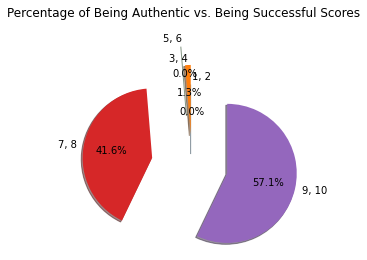

In [12]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Being Authentic vs. Successful"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Being Authentic vs. Being Successful Scores")
plt.savefig("pie-6-being-histogramlike-bavsbs.svg")
plt.show()


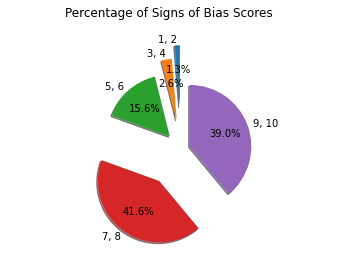

In [14]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Signs of Bias"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Signs of Bias Scores")
plt.savefig("pie-7-being-histogramlike-Signs of Bias.svg")
plt.show()


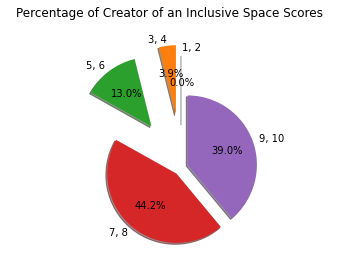

In [17]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Creator of an Inclusive Space"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Creator of an Inclusive Space Scores")
plt.savefig("pie-8-being-histogramlike-Creator of an Inclusive Space.svg")
plt.show()


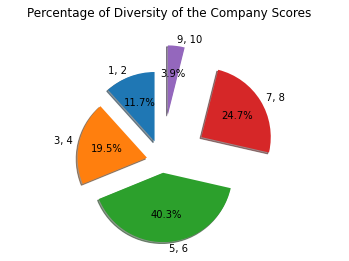

In [18]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Diversity of the Company"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Diversity of the Company Scores")
plt.savefig("pie-9-being-histogramlike-Diversity of the Company.svg")
plt.show()


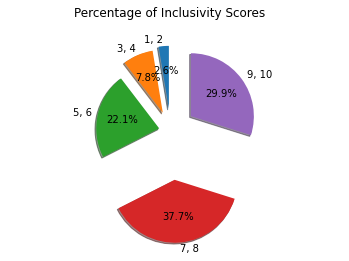

In [19]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Inclusivity"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Inclusivity Scores")
plt.savefig("pie-10-being-histogramlike-Inclusivity.svg")
plt.show()


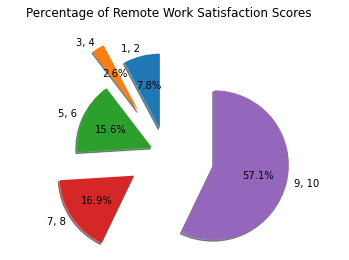

In [20]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Remote Work Satisfaction"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Remote Work Satisfaction Scores")
plt.savefig("pie-10-being-histogramlike-Remote Work Satisfaction.svg")
plt.show()


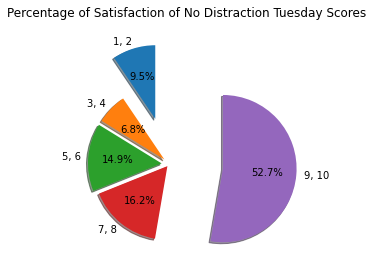

In [21]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Satisfaction of No Theory Tuesday"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Satisfaction of No Distraction Tuesday Scores")
plt.savefig("pie-10-being-histogramlike-Satisfaction of No Theory Tuesday.svg")
plt.show()


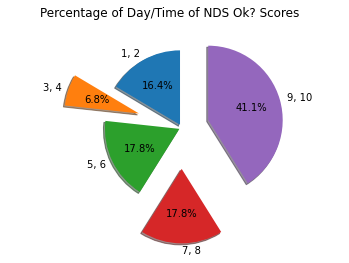

In [22]:
vals = {}

for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

for val in fr1_df["Day/Time of NDS Ok?"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

from random import uniform

ex = [uniform(0, 0.8) for x in vals.keys()]


fig1, ax1 = plt.subplots()
ax1.pie(vals.values(), explode=ex, labels=vals.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
fig1.suptitle("Percentage of Day/Time of NDS Ok? Scores")
plt.savefig("pie-10-being-histogramlike-DayTime of NDS Ok.svg")
plt.show()


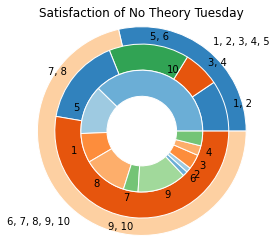

In [29]:
vals = {}
vals_no_bin = {}
vals_big_bin = {}
for i, j in zip([1, 3, 5, 7, 9], [2, 4, 6, 8 , 10]):
  vals[f"{i}, {j}"] = 0

vals_big_bin["1, 2, 3, 4, 5"] = 0
vals_big_bin["6, 7, 8, 9, 10"] = 0


for val in fr1_df["Satisfaction of No Theory Tuesday"]:
  if val in [1, 2, 3, 4, 5]:
    vals_big_bin["1, 2, 3, 4, 5"] += 1
  else:
    vals_big_bin["6, 7, 8, 9, 10"] += 1


for val in fr1_df["Satisfaction of No Theory Tuesday"]:
  if val in [1, 2]:
    vals["1, 2"] += 1
  elif val in [3, 4]:
    vals["3, 4"] += 1
  elif val in [5, 6]:
    vals["5, 6"] += 1
  elif val in [7, 8]:
    vals["7, 8"] += 1
  elif val in [9, 10]:
    vals["9, 10"] += 1

for val in fr1_df["Satisfaction of No Theory Tuesday"]:
  if val in vals_no_bin:
    vals_no_bin[val] += 1
  else:
    vals_no_bin[val] = 1

fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
edge_colors = cmap(np.arange(2)*7)
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))


ax.pie(vals_big_bin.values(), labels=vals_big_bin.keys(), radius=1.2, colors=edge_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.values(), labels=vals.keys(), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals_no_bin.values(), labels=vals_no_bin.keys(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Satisfaction of No Theory Tuesday')
plt.show()

In [24]:
import numpy as np


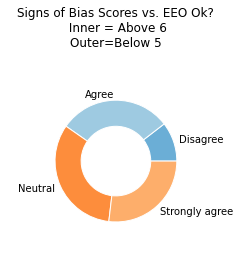

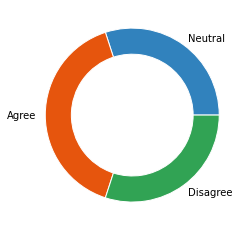

In [38]:
import collections
vals = {}

vals["Below 5"] = []
vals["Above 6"] = []
 
for sob_score, eeok in zip(fr1_df["Signs of Bias"], fr1_df["EEO Ok?"]):
  if sob_score <= 5:
    vals["Below 5"].append(eeok)
  else:
    vals["Above 6"].append(eeok)

fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
edge_colors = cmap(np.arange(2)*7)
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

plt.figure(0)
plt.pie(collections.Counter(vals["Below 5"]).values(), labels=collections.Counter(vals["Below 5"]).keys(), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.savefig("pie_imultiple_1.svg")
plt.figure(1)
plt.pie(collections.Counter(vals["Above 6"]).values(), labels=collections.Counter(vals["Above 6"]).keys(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Signs of Bias Scores vs. EEO Ok?\n Inner = Above 6\nOuter=Below 5')
plt.savefig("pie_imultiple_2.svg")
plt.show()

Counter({'Neutral': 25, 'Agree': 24, 'Strongly agree': 18, 'Disagree': 10})
Counter({'Majority': 63, 'Non-Majority': 11, 'How do we define the majority group?': 1, 'I believe it to be equal': 1, "I actually don't know.": 1})


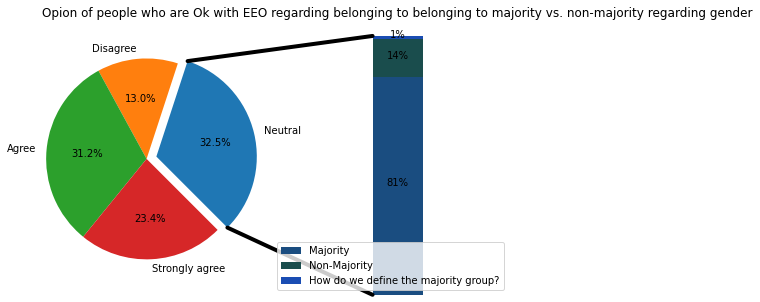

In [52]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

eeok_dict = collections.Counter(fr1_df["EEO Ok?"])
maj_nmaj_gender_dict = collections.Counter(fr1_df["Majority vs. Non-Majority - Gender"])

print(eeok_dict)
print(maj_nmaj_gender_dict)

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = list(eeok_dict.values())
labels = list(eeok_dict.keys())
explode = [0.1] + [0 for x in range(1, len(labels))]
# rotate so that first wedge is split by the x-axis
angle = -45 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [x / sum([maj_nmaj_gender_dict[key] for key in maj_nmaj_gender_dict.keys()]) for x in maj_nmaj_gender_dict.values()][:3]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Opion of people who are Ok with EEO regarding belonging to belonging to majority vs. non-majority regarding gender')
ax2.legend(tuple(maj_nmaj_gender_dict.keys()))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.savefig("bar_of_pies.svg")
plt.show()


In [50]:
[x / sum([maj_nmaj_gender_dict[key] for key in maj_nmaj_gender_dict.keys()]) for x in maj_nmaj_gender_dict.values()][:3]

[0.8181818181818182, 0.14285714285714285, 0.012987012987012988]